In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'utils')))

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from plotnine import *
from IPython.display import HTML
from utils.helper_funcs import *
import pickle as pkl
from fairlearn.reductions import ExponentiatedGradient
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.utils.validation") # ignore warnings about feature names

In [5]:
with open('output/results_test.pkl', 'rb') as f:
    results = pkl.load(f)

### Example SHAP Explanation

<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/2614118824.py:9: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/2614118824.py:9: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/2614118824.py:9: SyntaxWarning: invalid escape sequence '\g'


Text(0.3131435827520435, 0, 'mean UTI prob. = 0.313')
Text(0.3131435827520435, 1, 'mean UTI prob. = 0.313')


<Figure size 640x480 with 0 Axes>

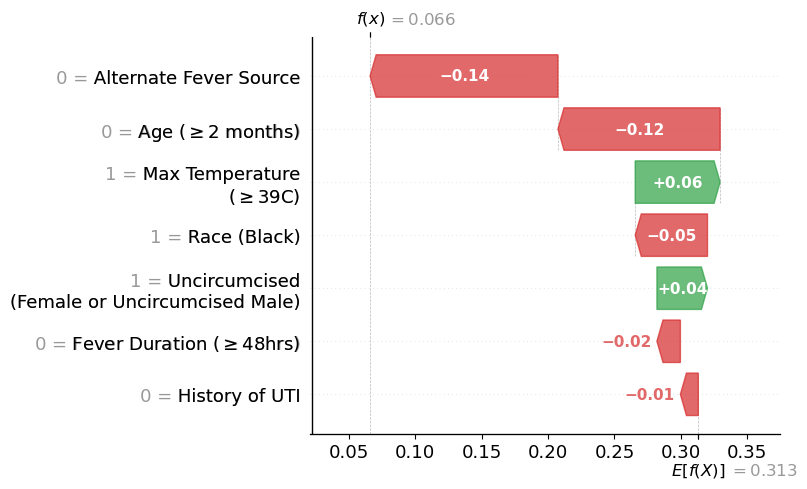

In [68]:
np.random.seed(20)
data = results['UTI']['shap_data'][0]
random_index = np.random.choice(data.index, size=1, replace=False)
lr_uti = pkl.load(open("models/Logistic Regression_UTI.pkl",'rb'))
probs = lr_uti.predict_proba(data)[:,1]

shap_values = results['UTI']['shap_values'][0]['Logistic Regression']
base_value = probs[random_index] - shap_values[random_index].sum()
names = ['Age ($\geq$2 months)', 'Max Temperature\n($\geq$39C)', 'History of UTI', 'Uncircumcised\n(Female or Uncircumcised Male)', 'Alternate Fever Source', 'Fever Duration ($\geq$48hrs)', 'Race (Black)']
exp = shap.Explanation(values=shap_values[random_index].flatten(), base_values=base_value[0], data=data.iloc[random_index, :].values.flatten().astype(int), feature_names=names)

# fig = plt.figure(figsize=(10, 6))  # Create a figure
# shap.waterfall_plot(exp)
# plt.draw()
# plt.savefig("output/shap_waterfall_example.pdf", format="pdf")
def rgba_to_hex(rgba):
    """
    Convert RGBA tuple (values 0-1) to Matplotlib hex with alpha (#RRGGBBAA).
    """
    return '#{:02X}{:02X}{:02X}{:02X}'.format(
        int(rgba[0]*255),
        int(rgba[1]*255),
        int(rgba[2]*255),
        int(rgba[3]*255)
    )

green_rgba = (0.176, 0.631, 0.263, 0.7)
red_rgba = (0.843, 0.157, 0.157, 0.7)
default_pos_color = "#ff0051"
default_neg_color = "#008bfb"
positive_color = rgba_to_hex(green_rgba)
negative_color = rgba_to_hex(red_rgba)
shap.plots.waterfall(exp, show = False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if isinstance(fcc, mpl.patches.FancyArrow):
            face_hex = mpl.colors.to_hex(fcc.get_facecolor())
            if face_hex.lower() == default_pos_color:
                fcc.set_facecolor(positive_color)
                fcc.set_edgecolor(positive_color)   # <--- set edge as well
            elif face_hex.lower() == default_neg_color:
                fcc.set_facecolor(negative_color)
                fcc.set_edgecolor(negative_color)   # <--- set edge as well
        elif isinstance(fcc, plt.Text):
            # Optionally recolor text if desired
            txt_hex = mpl.colors.to_hex(fcc.get_color())
            if txt_hex.lower() == default_pos_color:
                fcc.set_color(positive_color)
            elif txt_hex.lower() == default_neg_color:
                fcc.set_color(negative_color)
            # Make bold
            fcc.set_fontweight('bold')
            fcc.set_fontsize(11)

ax = plt.gca()
ax.axvline(x=0.022, color='black', linewidth=1)


# Replace baseline label "E[f(x)] = ..."
custom_baseline_text = "mean UTI prob. = {:.3f}".format(exp.base_values)

for txt in plt.gcf().findobj(plt.Text):
    # print(txt)
    if "E[f(X)]" in txt.get_text():
        txt.set_text(custom_baseline_text)
        txt.set_fontweight("bold")      # optional
        txt.set_color("black")          # optional
        print(txt)


plt.tight_layout()
# Save as PDF
plt.savefig("output/shap_waterfall_example.pdf", format="pdf", bbox_inches='tight')
plt.show()


In [24]:
"E[f(X)]" in '\n$E[f(X)]$'

True

<Figure size 640x480 with 0 Axes>

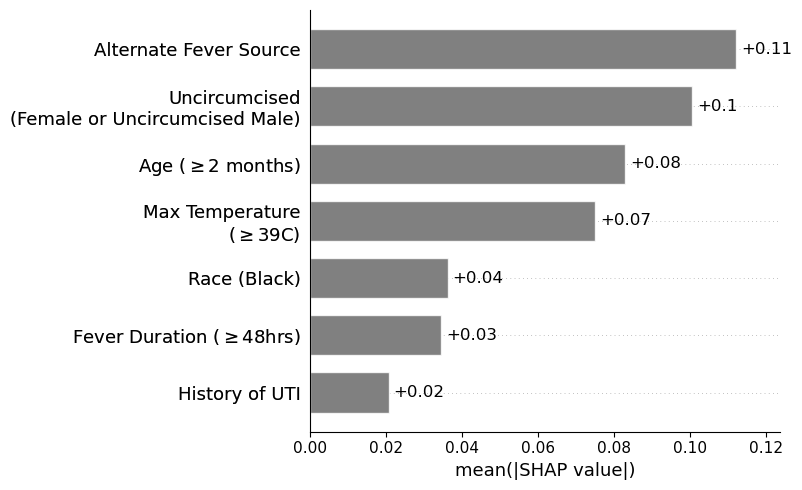

In [175]:
exp = shap.Explanation(values=shap_values, base_values=base_value[0], data=data, feature_names=names)

fig = plt.figure(figsize=(10, 6))  # Create a figure
shap.plots.bar(exp, show=False)
ax = plt.gca()  # get current axes
for patch in ax.patches:
    patch.set_facecolor('gray')  

for txt in ax.texts:
    txt.set_color('black')            # set text color
    txt.set_fontsize(12)             # optional: adjust font size

plt.tight_layout()  # automatically adjusts padding
plt.show()
plt.savefig("output/shap_bar_example.pdf", format="pdf")
plt.close(fig)

In [126]:

pd.DataFrame(np.abs(shap_values_UTI[0][model])).groupby(data_UTI['race'].astype(int)).mean()[order_idx]

,2,5,6,1,0,3,4
race,,,,,,,
0,0.176659,0.225604,0.293096,0.610165,0.717898,1.098344,0.815103
1,0.189875,0.306927,0.730578,0.542225,0.806628,1.306298,1.072288


<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
<>:13: SyntaxWarning: invalid escape sequence '\g'
<>:14: SyntaxWarning: invalid escape sequence '\g'
<>:16: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/1655752176.py:13: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/1655752176.py:14: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_1036/1655752176.py:16: SyntaxWarning: invalid escape sequence '\g'


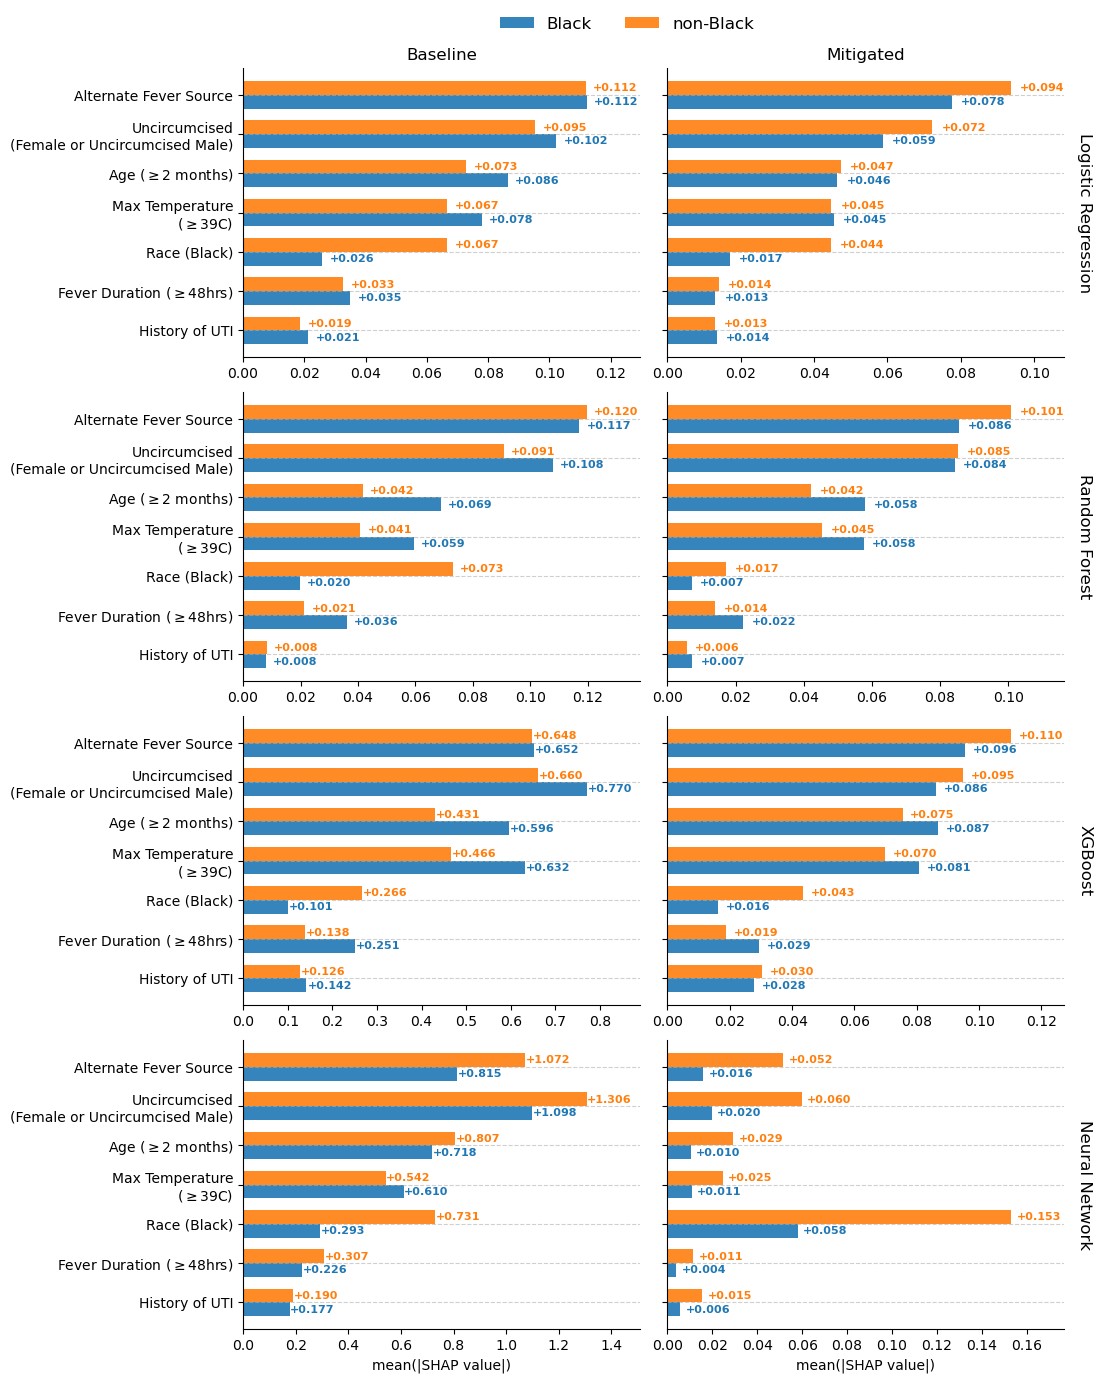

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

shap_values_UTI = results['UTI']['shap_values']
data_UTI = results['UTI']['shap_data'][0]

fontsize = 12

custom_order = [
    'Alternate Fever Source',
    'Uncircumcised\n(Female or Uncircumcised Male)',
    'Age ($\geq$2 months)',
    'Max Temperature\n($\geq$39C)',
    'Race (Black)',
    'Fever Duration ($\geq$48hrs)',
    'History of UTI'
]
order_idx = list(reversed([names.index(f) for f in custom_order]))
features_ordered = [names[i] for i in order_idx]

fig, axes = plt.subplots(4, 2, figsize=(12, 15))
axes = axes.flatten()
race_colors = ['#1f77b4', '#ff7f0e']
bar_width = 0.35

for i, model in enumerate(shap_values_UTI[0].keys()):
    for j in range(2):  # 0 = baseline, 1 = mitigated
        ax = axes[i*2 + j]
        plot_data = pd.DataFrame(np.abs(shap_values_UTI[j][model]))  # j = 0 baseline, 1 mitigated
        plot_data['race'] = data_UTI['race'].astype(int)
        plot_data = plot_data.groupby('race').mean()[order_idx]

        y = np.arange(len(features_ordered))  # positions for features

        for r, race in enumerate(plot_data.index):
            offset = (r - (len(plot_data.index)-1)/2) * bar_width
            vals = plot_data.loc[race].values
            bars = ax.barh(y + offset, vals, height=bar_width, color=race_colors[r], label=f'Race {race}', alpha=0.9)

            # add text at end of bars
            for bar, val in zip(bars, vals):
                ax.text(
                    bar.get_width() + 0.0025,
                    bar.get_y() + bar.get_height()/2,
                    f"+{val:.3f}",
                    va='center',
                    ha='left',
                    color=race_colors[r],
                    fontweight='bold',   # makes text bold
                    fontsize=8
                )

        ax.set_yticks(y)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if j == 0:
            ax.set_yticklabels(features_ordered)
            if i == 0:
                ax.set_title("Baseline", fontsize=fontsize)
        else:
            ax.set_yticklabels([])  # only first column shows feature names
            ax.set_ylabel(f"{model}", rotation=270, labelpad=20, fontsize=fontsize)
            ax.yaxis.set_label_position("right")  # move label to the righ
            if i == 0:
                ax.set_title("Mitigated", fontsize=fontsize)
        # dynamically extend x-axis by 10%
        x_min, x_max = ax.get_xlim()
        ax.set_xlim(x_min, x_max*1.1)

        if i == 3:
            ax.set_xlabel('mean(|SHAP value|)')

handles, labels = ax.get_legend_handles_labels()  # get from any ax
fig.legend(handles, ['Black', 'non-Black'], loc='lower center',
    ncol=2,
    fontsize=fontsize,
    frameon=False,
    bbox_to_anchor=(0.6, 0.9),
    borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(left=0.28, top=0.88)  # increase from default 0.125



plt.savefig("output/shap_ranking_example.pdf", format="pdf")
plt.show()
plt.close(fig)
